## Notebook for quantifying the effect of air density calculation and its usage in energy production estimation

In [1]:
# adjusted wind speed = original wind speed * (density/1.225)^1/3
# Air density = Pressure [in hectopascals]/(287.05 * Temperature [in Kelvin])

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import matplotlib.pyplot as plt
from dw_tap.lom import run_lom
import os
import seaborn as sns
import glob

%matplotlib inline
%config InlineBackend.figure_format='retina'

/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
wtk_df = pd.read_csv("01 Bergey Turbine Data/wtk_tp.csv.bz2")
wtk_df

,datetime,ws,wd,temp,pres,inversemoninobukhovlength_2m,tid,packet_date
0,2007-01-01 00:00:00,8.140454,317.158309,274.491089,95855.878100,-0.001159,t007,2007-01-01 00:00:00+00:00
1,2007-01-01 01:00:00,8.985741,319.570287,273.391510,95865.784807,-0.001553,t007,2007-01-01 01:00:00+00:00
2,2007-01-01 02:00:00,10.039049,319.680120,272.905823,95888.070047,-0.001052,t007,2007-01-01 02:00:00+00:00
3,2007-01-01 03:00:00,10.384051,317.920026,272.193817,95940.217926,-0.000963,t007,2007-01-01 03:00:00+00:00
4,2007-01-01 04:00:00,9.927510,318.450687,271.839966,95999.264587,-0.000963,t007,2007-01-01 04:00:00+00:00
...,...,...,...,...,...,...,...,...
1165987,2013-12-31 19:00:00,1.953942,34.086751,257.014679,99972.646692,-0.120668,t221,2013-12-31 19:00:00+00:00
1165988,2013-12-31 20:00:00,2.318397,47.535269,257.426666,99966.343823,-0.062508,t221,2013-12-31 20:00:00+00:00
1165989,2013-12-31 21:00:00,2.564894,52.266751,257.689163,99973.630399,-0.031844,t221,2013-12-31 21:00:00+00:00
1165990,2013-12-31 22:00:00,3.093438,55.602354,257.821899,99954.445842,-0.006792,t221,2013-12-31 22:00:00+00:00


<AxesSubplot:>

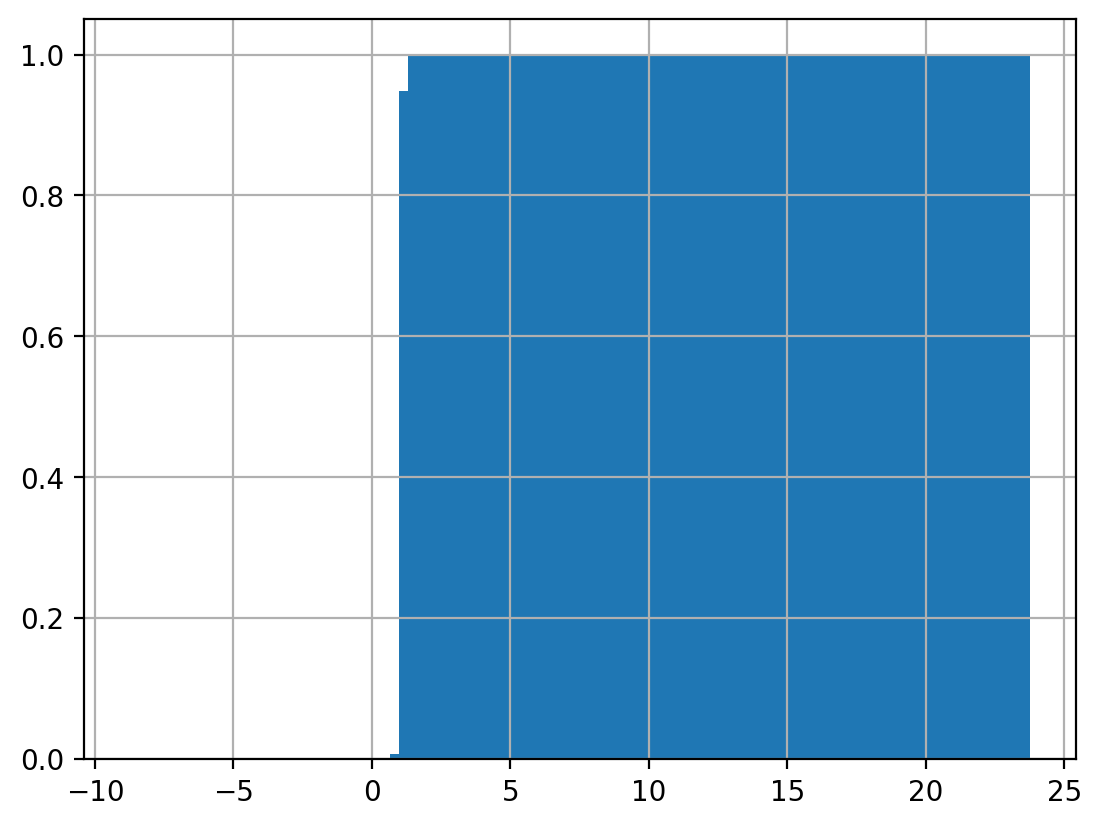

In [4]:
air_density = wtk_df["pres"] / (287.05 * wtk_df["temp"])
air_density.hist(cumulative=True, density=1, bins = 100)

In [5]:
air_density.describe()

count    1.165992e+06
mean     1.200551e+00
std      2.402112e-01
min     -8.778800e+00
25%      1.162061e+00
50%      1.201768e+00
75%      1.254720e+00
max      2.377967e+01
dtype: float64

In [6]:
wtk_df["ws_adjusted_for_density"] = wtk_df["ws"] * ((air_density/1.225)**(1/3))
wtk_df["ws_adjusted_for_density"]

0           8.121712
1           8.977365
2          10.036415
3          10.392254
4           9.941700
             ...    
1165987     2.020792
1165988     2.396385
1165989     2.650338
1165990     3.195737
1165991     3.272130
Name: ws_adjusted_for_density, Length: 1165992, dtype: float64

<AxesSubplot:>

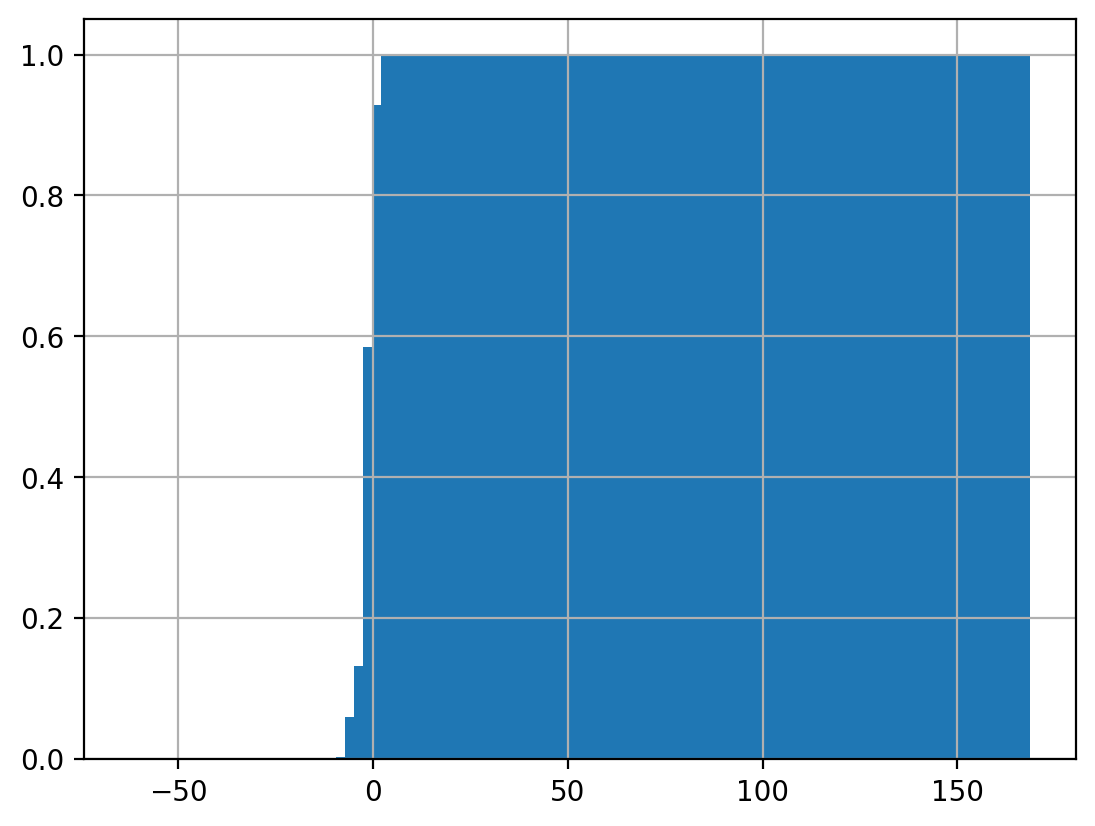

In [7]:
percent_diff = (wtk_df["ws_adjusted_for_density"] - wtk_df["ws"] ) / wtk_df["ws"] * 100.0
percent_diff.hist(cumulative=True, density=1, bins = 100)

In [8]:
percent_diff.describe()

count    1.165368e+06
mean    -6.621420e-01
std      2.530852e+00
min     -6.267760e+01
25%     -1.740880e+00
50%     -6.348867e-01
75%      8.029489e-01
max      1.687550e+02
dtype: float64

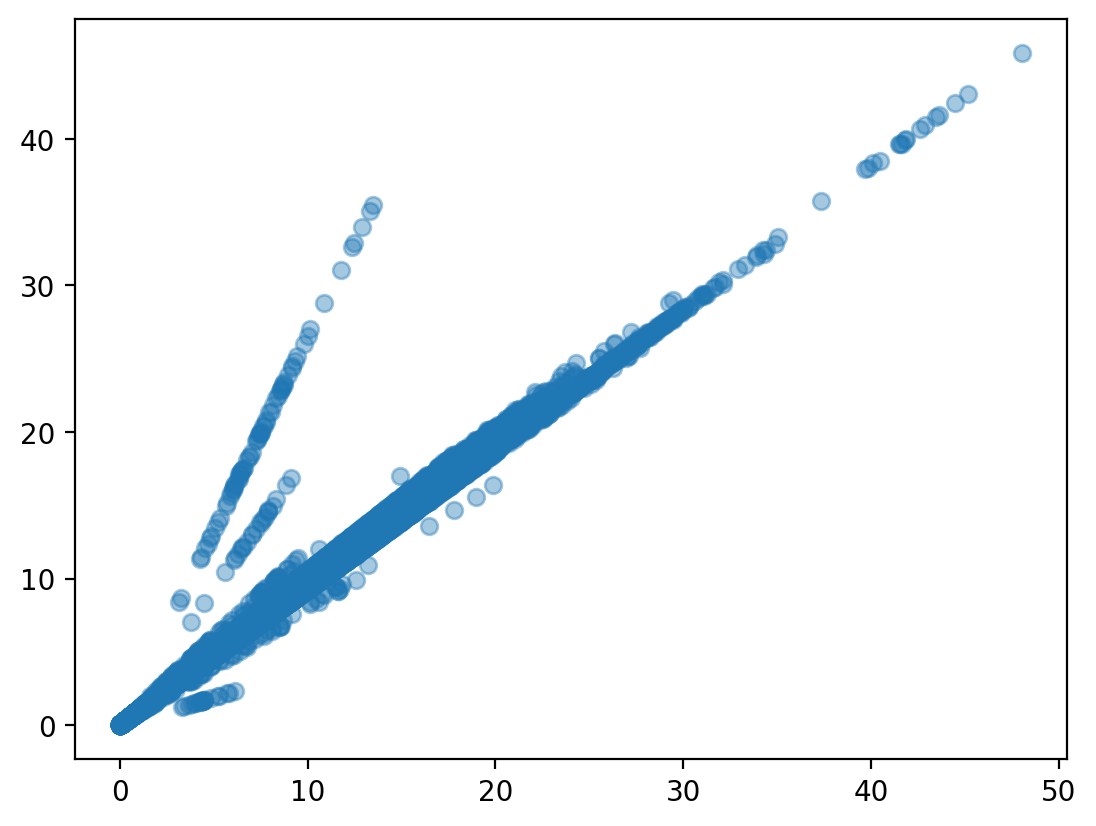

In [9]:
plt.scatter(wtk_df["ws"], wtk_df["ws_adjusted_for_density"], alpha=0.4);